# <center>Homework Assignment 2: Exploratory Data Analysis (EDA)</center>
## <center>9th September 2024</center>
#### <center>Syed Asghar Abbas Zaidi 07201 in CS/CE 457/464-L1</center>
#### <center>sz07201@st.habib.edu.pk</center>


# Part 1

#### Importing Libraries

In [575]:
import pandas as pd
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     

#### Loading the Data Set

In [578]:
df = pd.read_csv("FIFA_Players_Data.csv")
df.head(5)

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,skill_ball_control,power_stamina
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,6/24/1987,169,67,Argentina,FC Barcelona,93,...,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,96,77-1
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,2/5/1985,185,80,Portugal,Real Madrid,92,...,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,92-3,89
2,9014,A. Robben,Arjen Robben,30,1/23/1984,180,80,Netherlands,FC Bayern München,90,...,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,90+1,78+11
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,10/3/1981,195,95,Sweden,Paris Saint-Germain,90,...,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,90,78
4,167495,M. Neuer,Manuel Neuer,28,3/27/1986,193,92,Germany,FC Bayern München,90,...,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,31,44+9


It's a good practice to check out the data-types of every columns beforehand, so we will be doing that

In [580]:
df.dtypes

sofifa_id                     int64
short_name                   object
long_name                    object
age                           int64
dob                          object
height_cm                     int64
weight_kg                     int64
nationality                  object
club                         object
overall                       int64
potential                     int64
player_positions             object
preferred_foot               object
international_reputation      int64
weak_foot                     int64
skill_moves                   int64
work_rate                    object
body_type                    object
real_face                    object
release_clause_eur          float64
team_position                object
team_jersey_number          float64
joined                       object
contract_valid_until        float64
nation_position              object
nation_jersey_number        float64
pace                        float64
shooting                    

Now we will be re-naming few columns so that it is easier for us to call onto them we are accessing the columns when coding

In [584]:
df = df.rename(columns={"sofifa_id": "ID",
                        "height_cm": "cm", 
                        "weight_kg": "kg", 
                        "nationality": "nation", 
                        "player_positions": "PP",
                        "preferred_foot": "PF",
                        "international_reputation": "IR", 
                        "release_clause_eur": "RC",
                       "contract_valid_until": "Valid",
                       "nation_position":"NP",
                       "nation_jersey_number":"NJ_number",
                        "skill_ball_control":"Skill_B",
                        "team_jersey_number":"TJ-number"
                       })
df.dtypes

ID                 int64
short_name        object
long_name         object
age                int64
dob               object
cm                 int64
kg                 int64
nation            object
club              object
overall            int64
potential          int64
PP                object
PF                object
IR                 int64
weak_foot          int64
skill_moves        int64
work_rate         object
body_type         object
real_face         object
RC               float64
team_position     object
TJ-number        float64
joined            object
Valid            float64
NP                object
NJ_number        float64
pace             float64
shooting         float64
passing          float64
dribbling        float64
defending        float64
physic           float64
Skill_B           object
power_stamina     object
dtype: object

#### Checking Total Records

In [587]:
df.shape

(15465, 34)

In [589]:
df.count()

ID               15465
short_name       15465
long_name        15465
age              15465
dob              15465
cm               15465
kg               15465
nation           15465
club             15465
overall          15465
potential        15465
PP               15465
PF               15465
IR               15465
weak_foot        15465
skill_moves      15465
work_rate        15465
body_type        15465
real_face        15465
RC                   0
team_position    15233
TJ-number        15233
joined           14314
Valid            15226
NP                1056
NJ_number         1056
pace             13762
shooting         13762
passing          13762
dribbling        13762
defending        13762
physic           13762
Skill_B          15465
power_stamina    15465
dtype: int64

#### Checking Duplicates

In [592]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 34)


In [593]:
sum(df.duplicated())

0

In [594]:
df2 = df.drop_duplicates()
df2.head(5)

,ID,short_name,long_name,age,dob,cm,kg,nation,club,overall,...,NP,NJ_number,pace,shooting,passing,dribbling,defending,physic,Skill_B,power_stamina
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,6/24/1987,169,67,Argentina,FC Barcelona,93,...,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,96,77-1
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,2/5/1985,185,80,Portugal,Real Madrid,92,...,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,92-3,89
2,9014,A. Robben,Arjen Robben,30,1/23/1984,180,80,Netherlands,FC Bayern München,90,...,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,90+1,78+11
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,10/3/1981,195,95,Sweden,Paris Saint-Germain,90,...,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,90,78
4,167495,M. Neuer,Manuel Neuer,28,3/27/1986,193,92,Germany,FC Bayern München,90,...,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,31,44+9


In [596]:
df2.shape

(15465, 34)

### Handling Missing Values

In [600]:
df2.isnull().sum()

ID                   0
short_name           0
long_name            0
age                  0
dob                  0
cm                   0
kg                   0
nation               0
club                 0
overall              0
potential            0
PP                   0
PF                   0
IR                   0
weak_foot            0
skill_moves          0
work_rate            0
body_type            0
real_face            0
RC               15465
team_position      232
TJ-number          232
joined            1151
Valid              239
NP               14409
NJ_number        14409
pace              1703
shooting          1703
passing           1703
dribbling         1703
defending         1703
physic            1703
Skill_B              0
power_stamina        0
dtype: int64

## Basic guideline with which I will be handling the data-cleaning e.t.c.

If you have 2%, 3% or 5% of missing values, then you drop those rows which contains those values, that's an industry rule of thumb as stated by Professor in Second Online Meeting on Friday.
But if you have 5% or more than 10% of missing value, then you can "think" of filling them 
However, if it's 20% then you are losing a lot of information. 

For categorical, use mode 

For Numerical, use mean 

For ordinal numerical, use median (or mode if situation calls for it)

In [603]:
percent_missing = df2.isnull().sum() * 100 / len(df2)
missing_value_df = pd.DataFrame({'column_name': df2.columns,
                                 'percent_missing': percent_missing}).round(2).sort_values(by='percent_missing',ascending=False).reset_index(drop=True)
missing_value_df

,column_name,percent_missing
0,RC,100.00
1,NJ_number,93.17
2,NP,93.17
3,pace,11.01
4,physic,11.01
5,defending,11.01
6,dribbling,11.01
7,passing,11.01
8,shooting,11.01
9,joined,7.44


As Professor said, if we are losing more than 20% of the information, then that's a significant loss of information, that's why even if I try to fill in the missing values, the resulting insight will be extremely skewed so I felt that it would be better to remove the entire column them from the table cause we can barely extract any information from that column!

In [606]:
df3 = df2.drop(['RC','NJ_number','NP'], axis=1)

In [607]:
df3['pace'].dtypes

dtype('float64')

Cause this (and following subsequent ones) are a float64, and it isn't an ordinal data, we will be using mean to fill in the values. As only 11% of the data remains, we just can't remove the columns as is, or rows as is so we will try filling them. 

For pace, physic, defending, dribbling, passing and shooting, cause these are all numerical ratio-data, we can use mean to fill them out!
As for "Joined Date", it's a categorical thing, so we will be using mode to fill that out.

In [610]:
df3['pace'] = df3['pace'].fillna(df['pace'].mean())
df3['physic'] = df3['physic'].fillna(df['physic'].mean())
df3['defending'] = df3['defending'].fillna(df['defending'].mean())
df3['dribbling'] = df3['dribbling'].fillna(df['dribbling'].mean())
df3['passing'] = df3['passing'].fillna(df['passing'].mean())
df3['shooting'] = df3['shooting'].fillna(df['shooting'].mean())

df3['joined'] = df3['joined'].fillna(df['joined'].mode()[0])


As "valid", "TJ-Number", and "Team-position" have only 1.55% missing values, so that means we can drop those rows by industrial standards

In [615]:
#df3.columns.tolist()
df4 = df3.dropna()

In [617]:
df4.count()

ID               15226
short_name       15226
long_name        15226
age              15226
dob              15226
cm               15226
kg               15226
nation           15226
club             15226
overall          15226
potential        15226
PP               15226
PF               15226
IR               15226
weak_foot        15226
skill_moves      15226
work_rate        15226
body_type        15226
real_face        15226
team_position    15226
TJ-number        15226
joined           15226
Valid            15226
pace             15226
shooting         15226
passing          15226
dribbling        15226
defending        15226
physic           15226
Skill_B          15226
power_stamina    15226
dtype: int64

In [619]:
df4.isnull().sum()

ID               0
short_name       0
long_name        0
age              0
dob              0
cm               0
kg               0
nation           0
club             0
overall          0
potential        0
PP               0
PF               0
IR               0
weak_foot        0
skill_moves      0
work_rate        0
body_type        0
real_face        0
team_position    0
TJ-number        0
joined           0
Valid            0
pace             0
shooting         0
passing          0
dribbling        0
defending        0
physic           0
Skill_B          0
power_stamina    0
dtype: int64

We can observe that there is no null values remaining as we have either filled the data or removed them accordingly

## Handling Data Cleaning (Skill Ball Control and Power Stamina)

### Skill Ball Control

In [623]:
df4['Skill_B'].head(10)

0      96
1    92-3
2    90+1
3      90
4      31
5      89
6      89
7    87-1
8      86
9    91-1
Name: Skill_B, dtype: object

In this code, I define a function process_value to handle the values in my 'Skill_B' column. I check if each value contains a '+' or '-' and perform the appropriate arithmetic operation, while directly converting single numbers to integers

In [626]:
def process_value(num):
    if '+' in num:
        base, addition = num.split('+')
        return int(base) + int(addition)
    elif '-' in num:
        base, subtraction = num.split('-')
        return int(base) - int(subtraction)
    else:
        return int(num)

df['Skill_B'] = df['Skill_B'].apply(process_value)
df['Skill_B'] = pd.to_numeric(df['Skill_B'])

In [628]:
df4['Skill_B'] = df['Skill_B']
df4['Skill_B']

C:\Users\DELL\AppData\Local\Temp\ipykernel_55364\2666201454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Skill_B'] = df['Skill_B']


0        96
1        89
2        91
3        90
4        31
         ..
15460    26
15461    30
15462    32
15463    35
15464    44
Name: Skill_B, Length: 15226, dtype: int64

In [630]:
# def process_value(num):
#     num = str(num).strip()
#     if '+' in num:
#         base, addition = num.split('+')
#         return int(base) + int(addition)
#     elif '-' in num:
#         base, subtraction = num.split('-')
#         return int(base) - int(subtraction)
#     else:
#         return int(num)


# # Apply the function to the 'skill_ball_control' column
# df4.loc[:, 'Skill_B'] = df4['Skill_B'].apply(process_value)

# # Convert the column to numeric to ensure uniformity
# df4.loc[:, 'Skill_B'] = pd.to_numeric(df4['Skill_B'], errors='coerce')

# print(df4['Skill_B'])

### Power Stamina

In [633]:
df4['power_stamina'].head(10)

0     77-1
1       89
2    78+11
3       78
4     44+9
5       86
6     74+1
7       72
8       86
9       72
Name: power_stamina, dtype: object

In [635]:
# df4.loc[:, 'power_stamina'] = df4['power_stamina'].apply(process_value)
# df4.loc[:, 'power_stamina'] = pd.to_numeric(df4['power_stamina'], errors='coerce')
df['power_stamina'] = df['power_stamina'].apply(process_value)
df['power_stamina'] = pd.to_numeric(df['power_stamina'])
df4['power_stamina'] = df['power_stamina']
print(df4['power_stamina'])

0        76
1        89
2        89
3        78
4        53
         ..
15460    56
15461    47
15462    87
15463    70
15464    25
Name: power_stamina, Length: 15226, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_55364\1142221479.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['power_stamina'] = df['power_stamina']


# PART 2 (Exploratory Data Analysis)

## Univariate

Few extra lines of code that I wrote for myself to better understand the code and various other stuff

In [640]:
# Group by 'Make' and calculate mean and count for 'Price' and 'Horsepowe
# mode_table = df.groupby('club')['body_type'].agg(lambda x: x.mode()[0])
# mode_table

# mean_count_table = df.groupby('club')[['age', 'IR']].agg(['median', 'describe'])
# mean_count_IR = df.groupby('club')['IR'].agg(['median', 'describe'])
# mean_count_IR

# # print(mean_count_table.sort_values(by=('IR', 'median'), ascending=False))
# sorted_table = mean_count_IR.sort_values(by=('IR', 'median'), ascending=False)
# print(sorted_table)

### Sorting Overall Skill Level Using Mean by Age
We used mean cause I really doubt that there is a huge outlier in age in such an environment like competitive football, thus I am assuming a fairly normal distribution. In which case, using "mean" is most preferred

In [643]:
# grouped_mode = df.groupby('age')['overall'].agg(lambda x: x.mode()[0])
grouped_mean = df.groupby('age')['overall'].mean()
sorted_age = grouped_mean.sort_values(ascending=False) #This will sort the values by skill level and not age!
print(sorted_age)

age
43    78.000000
39    67.666667
33    67.497222
32    67.449309
29    67.362550
28    67.321346
30    67.155280
35    67.072464
31    67.007339
34    66.976471
27    66.879555
37    66.782609
26    66.271536
36    66.035294
25    65.945681
38    65.851852
40    65.285714
24    64.962523
23    64.318914
22    62.965748
41    62.400000
21    61.983993
20    60.015437
42    59.250000
19    57.892713
18    55.611940
44    55.500000
17    54.350515
16    54.103448
Name: overall, dtype: float64


The dataset presents skill levels, measured on a scale from 0 to 100, across various ages. 

In analyzing ratio data, such as skill levels on a 0-100 scale, the mean is generally preferred over the median or mode. This is because the mean incorporates all values and their differences, providing a precise measure of central tendency. It effectively reflects the overall average skill level, capturing detailed trends across the dataset. The median, while useful for ordinal data or skewed distributions, only indicates the middle value and does not account for the exact differences between values. The mode, representing the most frequent value, is often less informative for continuous data. **Therefore**, the mean offers a comprehensive and accurate representation of the average within ratio data.

The highest skill level observed is 78 at age 43, indicating peak performance in this age group. For ages 28 to 37, skill levels are relatively stable and high, averaging around 67, suggesting that individuals in their late 20s to late 30s possess strong and consistent skills. In contrast, skill levels begin to decline from age 38 onwards, with a gradual decrease observed as age increases. By the early 40s, skill levels drop to the mid-60s and continue to decline to the mid-50s by age 44. Not only that, it can also be seen that ages from 16-22 have lowest overall skill if we don't consider the other extreme of age.

**This trend suggests that the skill level of an individual gets higher with age, until it starts diminishing due to "greater age" and deterioration of physical capabilities.**

### Looking into countries with the players of highest International Reputation!
We used mode cause it was a categorical data

In [647]:
# grouped_mode = df.groupby('team_position')['skill_moves'].agg(lambda x: x.mode()[0])
grouped_mode = df4.groupby('IR')['nation'].agg(lambda x: x.mode()[0])
# sorted_IR = grouped_mode.sort_values(ascending=False) #This will sort the values by skill level and not age!
# print(sorted_IR)
grouped_mode

IR
1        England
2          Italy
3         France
4        Germany
5    Netherlands
Name: nation, dtype: object

Cause Nations are of data-type categorical, we will be using "mode" an an appropriate summary method

The analysis of FIFA game players' data based on International Reputation (IR) levels provides insights into the geographical distribution of player talent. 
**The Netherlands emerges as the predominant nation for players with the highest IR rating of 5, suggesting a strong presence and high recognition of Dutch players within the game.** England, on the other hand, is most frequently associated with the lowest IR rating of 1, indicating that Italian players are less frequently highlighted at the highest levels of international reputation.

This analysis underscores the international diversity in player reputation, illustrating how different countries contribute to varying levels of recognition and skill in the game.

In [649]:
age_EDA = df4.age.value_counts().nlargest(20)
age_EDA

age
22    1197
21    1187
23    1179
20    1166
25    1123
24    1094
26    1068
19     988
27     988
28     862
29     753
18     737
30     644
31     545
32     434
33     360
17     291
34     255
35     138
36      85
Name: count, dtype: int64

The data shows that the population is heavily concentrated in the early twenties, with ages 22, 21, and 23 being the most common, each with over 1,100 individuals. Representation begins to decline after age 25, with a notable drop-off around age 30 and beyond. Ages 35 and 36 are the least represented, indicating that the dataset skews younger, likely reflecting a demographic such as students or a young workforce. The overall distribution peaks in the 20-25 age range, with fewer individuals in the late teens and those above 30.

### Nations from which the players belong to, Barchart Visualization

In [654]:
# club_EDA = df4.club.value_counts().largest
# club_EDA
nationality = df4.nation.value_counts().nlargest(20)
nationality

nation
England                1579
Spain                  1022
France                  875
Argentina               861
Italy                   778
Germany                 695
Colombia                516
Republic of Ireland     453
Mexico                  416
Chile                   410
Brazil                  405
Netherlands             391
Saudi Arabia            362
Sweden                  361
United States           338
Portugal                328
Turkey                  307
Scotland                299
Poland                  298
Denmark                 298
Name: count, dtype: int64

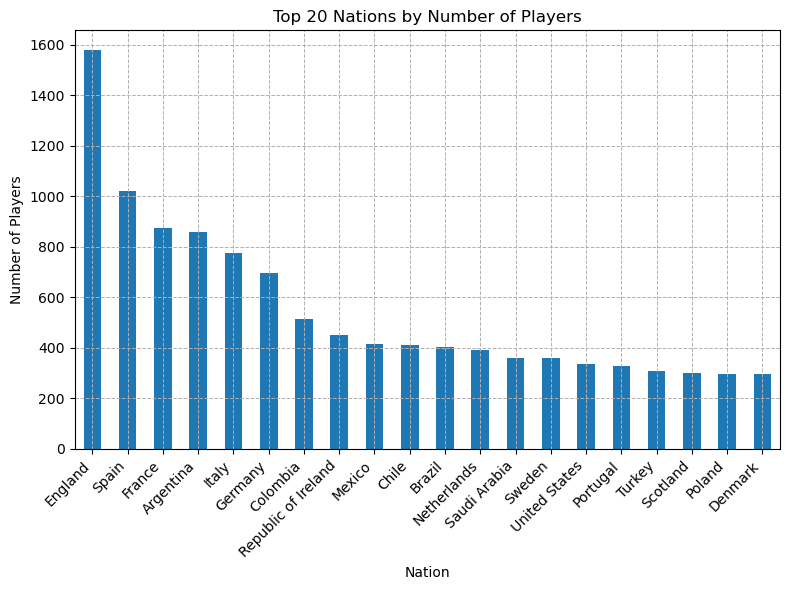

In [656]:
# age_EDA.plot(kind='hist', bins= 10, figsize=(5,5))
# df['club'].plot(kind='hist', bins =5, figsize=(8,6), edgecolor='black')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.title('Distribution of Player Ages')
# plt.grid(True)
# plt.show()
ax = df4['nation'].value_counts().nlargest(20)
a= ax.plot(kind='bar', figsize=(8, 6))
a.set_xlabel('Nation')
a.set_ylabel('Number of Players')
a.set_title('Top 20 Nations by Number of Players')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
a.grid(True, which='both', linestyle='--', linewidth=0.7)

# Show the plot
plt.tight_layout()
plt.show()

The dataset reveals significant disparities in player representation by country. England leads with 1,579 players, far surpassing Spain and France, which have 1,022 and 875 players, respectively. Argentina also shows strong representation with 861 players. In contrast, countries like Denmark and Poland, each with 298 players, exhibit much lower counts. The data suggests a few nations dominate the dataset, with England, Spain, and France accounting for a substantial portion of the total. The distribution is right-skewed, with the top countries having notably higher player counts compared to those with fewer players. This pattern highlights the dominance of certain footballing nations and the varying levels of global representation.

### Overall Rating of the players, Histogram Visualization

In [660]:
# bx = df4['overall'].value_counts()
#bx
bx = df4['overall']

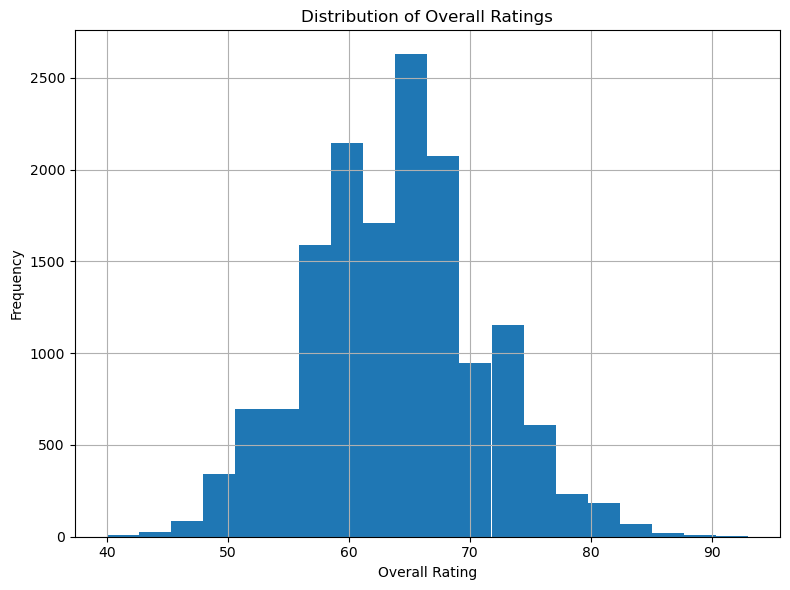

In [662]:
# age_EDA.plot(kind='hist', bins= 10, figsize=(5,5))
# df['club'].plot(kind='hist', bins =5, figsize=(8,6), edgecolor='black')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.title('Distribution of Player Ages')
# plt.grid(True)
# plt.show()
b= bx.plot(kind='hist', bins = 20, figsize=(8, 6))
# Add labels and title
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Ratings')

# Rotate x-axis labels for better readability
# plt.xticks(rotation=45, ha='right')
# b.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### Doing this through SNS library as well

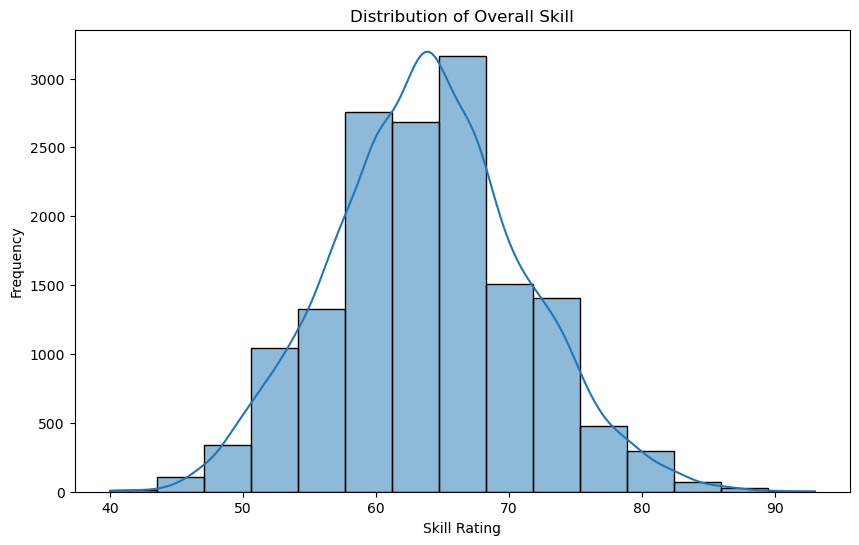

In [665]:
plt.figure(figsize=(10, 6))
sns.histplot(df4['overall'], bins=15, kde=True)
# sns.palplot(sns.color_palette("deep"))  # Display default colors
plt.xlabel('Skill Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Skill')
plt.show()

We can infer from this Histogram plot that the Overall ratings is almost normally distributed

This distribution indicates that most players have average skill levels around 60 - 70, almost all players have skills from 50 - 80 with fewer at the extremes of high or low ratings while. This balance is essential for ensuring fair gameplay and effective team building, as it helps identify standout players, guide player development, and maintain game balance. By understanding this distribution, players, teams, and analysts can make informed decisions, target improvements, and foster a competitive yet balanced gaming environment.

Aside of that, the generally normally distributed graph having mean greater than 50 makes sense, cause afterall, these are football players and are expected to demonstrate a greater skill level

## Bi-variate Analysis
### At least one scatter plot (continuous vs continuous)

In [669]:
df4.columns

Index(['ID', 'short_name', 'long_name', 'age', 'dob', 'cm', 'kg', 'nation',
       'club', 'overall', 'potential', 'PP', 'PF', 'IR', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face', 'team_position',
       'TJ-number', 'joined', 'Valid', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'Skill_B', 'power_stamina'],
      dtype='object')

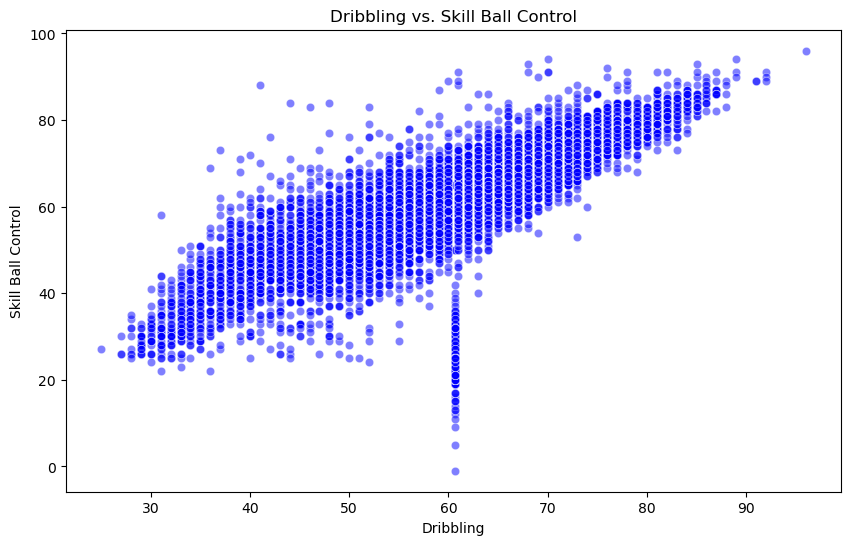

In [679]:
plt.figure(figsize=(10, 6))
# df_filtered = df4[df4['NP'] != 'GK']
sns.scatterplot(data=df4, x='dribbling', y='Skill_B', alpha=0.5, color='blue')
plt.xlabel('Dribbling')
plt.ylabel('Skill Ball Control')
plt.title('Dribbling vs. Skill Ball Control')
plt.show()

The scatter plot comparing dribbling with skill ball control reveals a clear linear pattern, indicating a strong positive correlation between these two skills. 

As players' dribbling abilities improve, there is a noticeable increase in their ball control, suggesting a robust connection between these attributes. There are some outliers at 60 Dribbling, but if we look past them, the trend generally demonstrates that enhanced dribbling often corresponds with better ball control, emphasizing how intertwined these skills are. The steady upward slope of the plot supports the notion that advancements in dribbling are likely to lead to greater proficiency in ball control. This insight is valuable for player development strategies, as it highlights the importance of focusing on dribbling practice to enhance overall ball control.

### Additionally confirming the correlation through "heatmap"

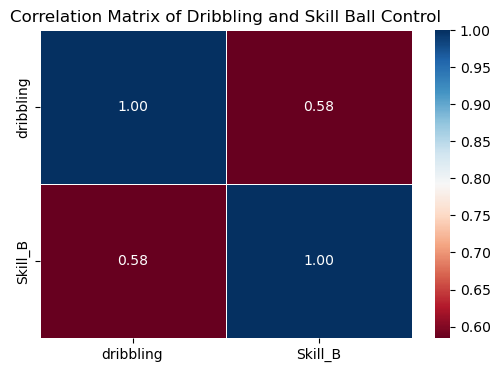

In [699]:
plt.figure(figsize=(6, 4))
correlation_matrix = df4[['dribbling', 'Skill_B']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Dribbling and Skill Ball Control')
plt.show()

A correlation coefficient of 0.58 clearly indicates a positive relationship between dribbling and skill ball control. This could have been much better and higher if there weren't any outliers in my data which we already saw above. So assuming we did a mistake in cleaning data, it would have further shown a VERY STRONG correlation between dribbling and Skill Ball Control.
Thus, we can infer that if we wanna make improvements in "Dribbling", improvements must also be done in "Skill Ball Control"

## Continuous vs Discrete
### Overall Rating vs Work Rate 

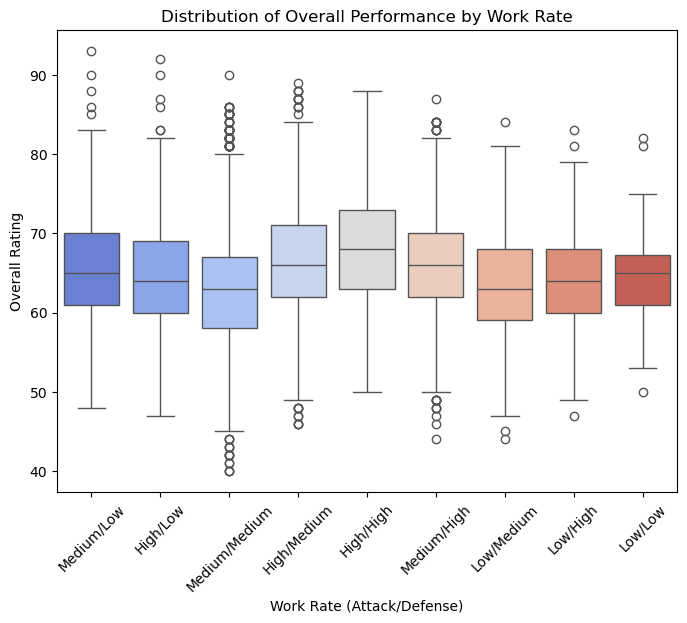

In [738]:



# Example DataFrame for context
# df4 = pd.DataFrame({'work_rate': ['Low', 'Medium', 'High'], 'overall': [75, 85, 90]})

plt.figure(figsize=(8, 6))

# Create a boxplot with a different color palette and updated x-axis label
sns.boxplot(data=df4, x='work_rate', y='overall', palette='coolwarm', hue='work_rate', legend=False)

# Update axis labels and title
plt.xlabel('Work Rate (Attack/Defense)')
plt.ylabel('Overall Rating')
plt.title('Distribution of Overall Performance by Work Rate')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


#### Analysis: 
The examination of the link between work rate and overall rating provides several important observations. Players who exhibit a high work rate in both attacking and defensive roles (high/high) generally achieve the highest average overall ratings. This indicates that any footballer that focuses on making his both fronts strong also have a better performance compared to those who lack in one area over the other. 

Additionally, we can see that players with a medium work rate in both areas (medium/medium) tend to have the lowest lower quartile ratings. This suggests that moderate work rate may instead be less effective and leads to overall diminished performance compared to higher ones.

Players with low work rates in both areas (low/low) show the smallest variation in overall ratings, reflecting a more stable yet generally lower performance level. 

Something to note is that the players with a medium offensive work rate and a low defensive work rate (medium/low) can still achieve high rating outliers.
This suggest a stronger offensive performance can offset a lower defensive work rate. 

In summary, the analysis underscores that a high work rate, especially in both roles, is usually associated with better performance, though some players can excel despite having a varied work rate profile.

## Correlation Matrix of Player Abilities, Correlation Plot

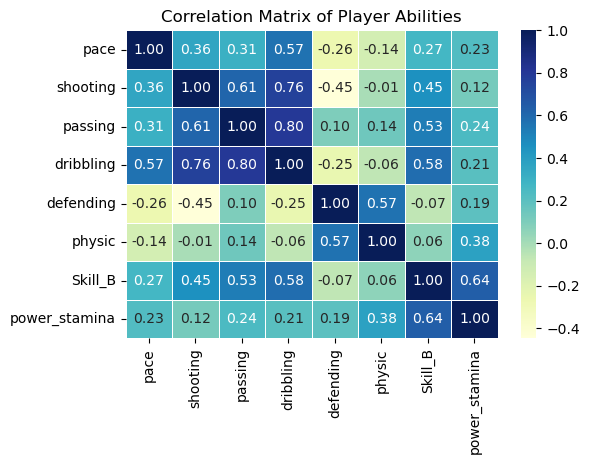

In [765]:
plt.figure(figsize=(6, 4))
c_matrix = df4[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'Skill_B', 'power_stamina']].corr()
sns.heatmap(c_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Player Abilities')
plt.show()

### Analysis
You can infer alot from this correleation matrix, especially related to player performance, and especially the general relation between different kinds of skill-set. If someone is good at dribbling, does that imply that he has a higher chance of being good at defending? Is there any correlation? if there is very high correlation, there is a chance that skills carry over. One could practice one skill to become good at other and vice versa and useful insights could be gained for the future.

It is important that correlation between the skill itself, the diagonal 1.00 going will always be the strongest. It's trivial and obvious. If you are good at dribbling, you are 100% good at dribbling. Keeping that aside, let's get into the analysis.

The most notable strong correlation in the multivariate correlation matrix is between "Dribbling" and "Passing" at 0.80 meaning. There is a veryyy high likelihood that if one were to be good at dribbling, they will also be good at passing. 

If we were to compare to "Shooting" and "Physical", it barely has a correlation of 0.01. We can't ever say for sure if one were to be good or bad at shooting, they will also be good or bad at "physical".

Third most notable observation is between "defending" and "dribbling" which have a correlation of -0.45. This means that if one were to be good or bad defending, there is a nice chance that they might be bad or good at dribbling respectively. It's not very low, but low enough that we can take information out of it. 

Other honorable observations is between dribbling and shooting with the correlation of 0.76, meaning one being good at dribbling is VERY likely to be good at shooting as well and e.t.c.

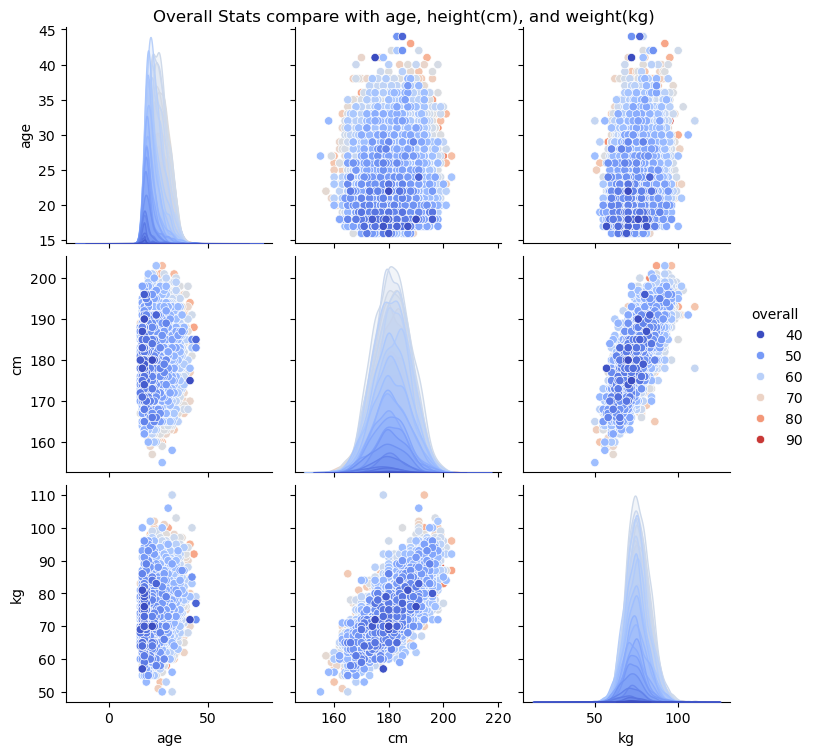

In [806]:
multivariate_df = df4[['overall', 'age', 'cm', 'kg']]
sns.pairplot(multivariate_df, diag_kind='kde', hue='overall', palette='coolwarm')
plt.suptitle('Overall Stats compare with age, height(cm), and weight(kg)', y=1)
plt.show()

### Analysis 
You could observe from the multivariate plotting that players which are of "middle-range" heights and "greater" age will have a higher likelihood of also having high rating. One could see that height and weight have strong correlation with each other, however the hue doesn't give us any extra information cause it's spread all over the place. HOWEVER, in age and height plot, we can see there is "red" hue on a greater age. This implies that with greater age, there is a high chance that player will also have a higher rating. This reflects the experience and skill that a player has built upon over the years. Additionaly, we have already did such an analysis beforehand, and such, this stays in-line with that analysis as well when we seperately compared overall skill with age. 

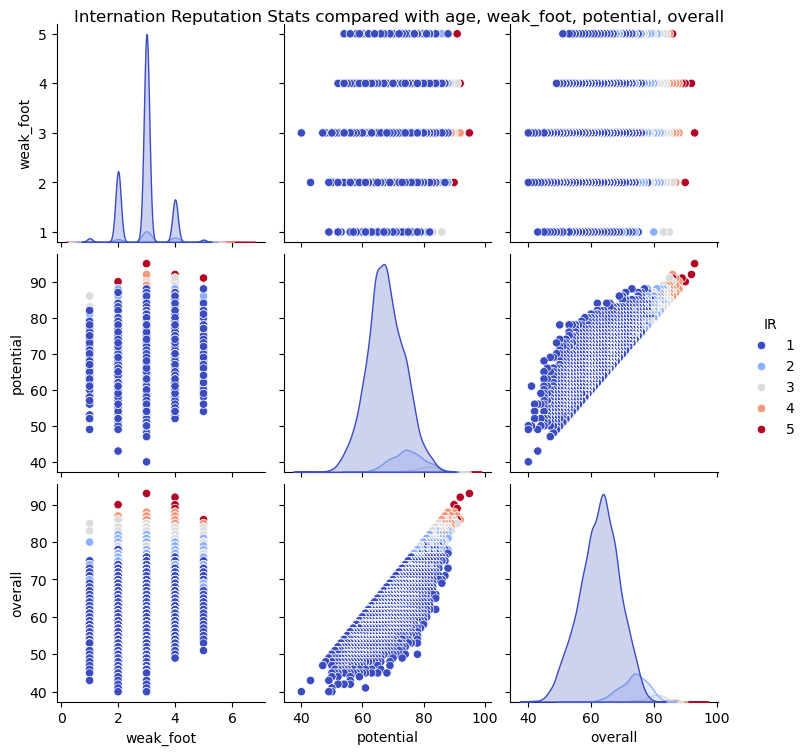

In [816]:
multivariate_df2 = df4[['IR', 'weak_foot', 'potential', 'overall']]
sns.pairplot(multivariate_df2, diag_kind='kde', hue='IR', palette='coolwarm')
plt.suptitle('Internation Reputation Stats compared with age, weak_foot, potential, overall', y=1)
plt.show()

### Analysis 
Before we begin our analysis, it is important to understand that higher rating in weak-foot means that a person is pretty good at that non-dominant foot.

Let's begin our analysis. We find a very interesting correlation when we look at bottom left. Where Weak_foot and overall skill are plotted, there is a greater red hue at the top. THIS implies that if a player is of greater overall skill level, they have a high chance to have a greater international reputation as well. This makes perfect chance, if a player is very skillful, they are also bound to be highly respected as well. Same could be observed potential and weak_foot graph, where red hue is observed on "right" side, irrespective of whether a player is good at their non-dominant feet, any player who have a high potential has a red hue which again makes sense. If a Player has alot of potential, they will have very high chance to have a greater international reputation as well. 

<!-- to be good with their non-dominant feet as well. This makes perfect chance as well! Same could be observed with Potential, if they have a higher potential, there is a high likely chance that they will be good at their non-dominant feet as well. 
 -->

In [491]:
# age_summary = df['age'].describe()
# print(age_summary)

In [492]:
#sns library
# ax = sns.countplot(x ='age', data = df4)
# ax.tick_params(axis='x', rotation=90)

In [494]:
# sns.countplot(x ='age', data = df4, order=df['age'].value_counts()[:10].index)

In [495]:
# # 4. Histogram of Shooting Scores
# age_EDA.plot(kind='bar', figsize=(5,5))
# df['shooting'].plot(kind='hist', title='Distribution of Shooting Scores', bins=100)
# plt.xlabel('Shooting')
# plt.show()